# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [3]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [4]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment
2,18.0,8,318,150,3436,11.0,P-1689802,Treatment
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment


<font size = "5">

Compute frequencies by status

In [9]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,231
Treatment,167


col_0,Frequency
status,
Control,0.580402
Treatment,0.419598


<font size = "5">

Query with string conditions

In [6]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [7]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,23.795808,5.419162,194.748503,2985.413174,15.681437
std,7.770785,1.690973,107.679954,840.437789,2.784956
min,10.000000,3.000000,68.000000,1795.000000,9.000000
25%,18.000000,4.000000,106.000000,2239.500000,14.000000
50%,23.200000,4.000000,151.000000,2795.000000,15.700000
75%,29.250000,7.000000,260.000000,3657.500000,17.400000
max,46.600000,8.000000,455.000000,5140.000000,24.800000


,mpg,cylinders,displacement,weight,acceleration
count,231.000000,231.000000,231.000000,231.000000,231.000000
mean,23.311255,5.480519,192.471861,2959.588745,15.486147
std,7.859055,1.711422,101.956930,853.098215,2.740942
min,9.000000,3.000000,70.000000,1613.000000,8.000000
25%,17.000000,4.000000,98.000000,2219.500000,13.750000
50%,22.000000,4.000000,146.000000,2807.000000,15.400000
75%,29.000000,8.000000,264.500000,3484.500000,17.000000
max,44.000000,8.000000,440.000000,4997.000000,24.600000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [26]:
# Create a sample dataframe
df = pd.DataFrame({'name': ['John', 'Jane', 'Bob', 'Alice'], 
                   'age': [25, 30, 20, 35]})

# Define the function
def fn_age_category(age):
    if age < 25:
        return 'Under 25'
    elif age >= 25 and age < 30:
        return '25-29'
    elif age >= 30 and age < 35:
        return '30-34'
    else:
        return 'Over 35'

# Apply the function to the 'age' column and create a new column called 'age_group'
df['age_group'] = df['age'].apply(fn_age_category)

# Print the resulting dataframe
print(df)


    name  age age_group
0   John   25     25-29
1   Jane   30     30-34
2    Bob   20  Under 25
3  Alice   35   Over 35


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [28]:
mean_mpg = carfeatures["mpg"].mean()

carfeatures.query("(mpg >= @mean_mpg) & (cylinders==8)")

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
300,23.9,8,260,90,3420,22.2,O-1693080,Control
364,26.6,8,350,105,3725,19.0,O-1693784,Control


In [ ]:
#another way to do this

# Read in the data
df = pd.read_csv("data/iris.csv")

# Define global variables
global_var_1 = "setosa"
global_var_2 = "versicolor"

# Define function to compute summary statistics
def compute_summary_stats(data):
    mean_val = data.mean()
    median_val = data.median()
    return mean_val, median_val

# Subset the data using queries
subset_1 = df.query('species == @global_var_1 & petal_length > 1.5')
subset_2 = df.query('species == @global_var_2 & sepal_length > 5')

# Compute summary statistics for each subset
subset_1_mean, subset_1_median = compute_summary_stats(subset_1['petal_width'])
subset_2_mean, subset_2_median = compute_summary_stats(subset_2['sepal_width'])

# Print out the results
print("Summary statistics for subset 1 (species = setosa, petal_length > 1.5):")
print("Mean petal width:", subset_1_mean)
print("Median petal width:", subset_1_median)

print("Summary statistics for subset 2 (species = versicolor, sepal_length > 5):")
print("Mean sepal width:", subset_2_mean)
print("Median sepal width:", subset_2_median)

In [29]:
# and another way to do this but not using global variables

def compute_summary_stats(data):
    # compute mean and median of column "x" for rows where "y" is True
    subset = data[data['y']]
    mean_x = subset['x'].mean()
    median_x = subset['x'].median()
    
    # compute sum of column "z" for rows where "y" is False
    other_subset = data[~data['y']]
    sum_z = other_subset['z'].sum()
    
    return mean_x, median_x, sum_z

mean_x, median_x, sum_z = compute_summary_stats(data)
print("Mean of x for rows where y is True:", mean_x)
print("Median of x for rows where y is True:", median_x)
print("Sum of z for rows where y is False:", sum_z)

TypeError: list indices must be integers or slices, not str

<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [34]:
display(carfeatures.iloc[0,:])

# Select the first row
df.iloc[0, :]

# Select the first column
df.iloc[:, 0]

# Select the first 3 rows
df.iloc[0:3, :]

# Select the first 3 columns
df.iloc[:, 0:3]

# Select the first and third rows
df.iloc[[0, 2], :]

# Select the first and third columns
df.iloc[:, [0, 2]]

mpg                  18.0
cylinders               8
displacement          307
horsepower            130
weight               3504
acceleration         12.0
vehicle_id      C-1689780
status            Control
Name: 0, dtype: object

,name,age_group
0,John,25-29
1,Jane,30-34
2,Bob,Under 25
3,Alice,Over 35


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [36]:
list_status = ["treatment","control"]
prop_status = [0.1,0.9]
size_dataset = len(carfeatures)

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status
                                         )

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [ ]:
def fn_hello(y,x,b0,b1)


<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

Text(0.5, 1.0, 'Distribution of Variable by Group')

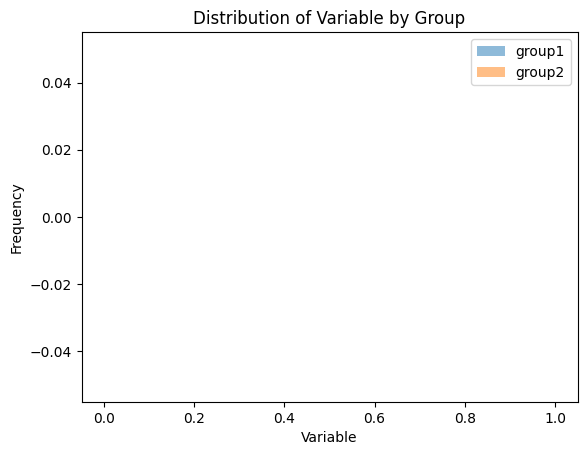

In [38]:
# create two separate data frames from the data subsets
df_group1 = carfeatures.query('status == "Treatment" ')
df_group2 = carfeatures.query('status == "Control" ')

# select the variable to plot from each data frame
var1 = df_group1['mpg']
var2 = df_group2['mpg']

# create histogram plot for group1
plt.hist(var1, alpha=0.5, label='group1')

# create histogram plot for group2
plt.hist(var2, alpha=0.5, label='group2')

# add legend
plt.legend()

# label the axes
plt.xlabel('Variable')
plt.ylabel('Frequency')

# add title
plt.title('Distribution of Variable by Group')

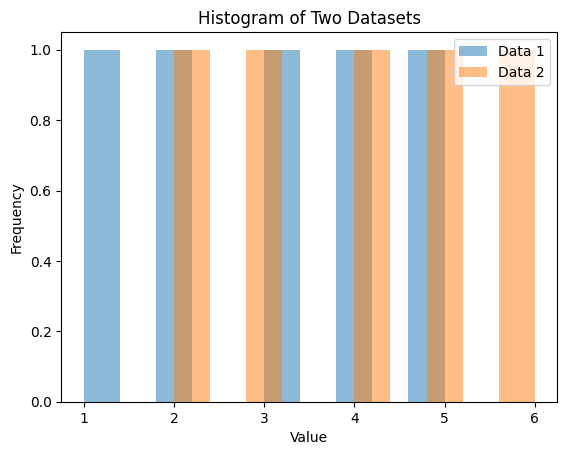

In [39]:
# Generate some example data
data1 = [1, 2, 3, 4, 5]
data2 = [2, 3, 4, 5, 6]

# Create two overlapping histograms
plt.hist(data1, alpha=0.5, label='Data 1')
plt.hist(data2, alpha=0.5, label='Data 2')

# Add legend and axis labels
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Two Datasets')

# Show the plot
plt.show()